# Introduction to Pandas

In [2]:
import pandas as pd

In [3]:
#  2 main datatypes
series = pd.Series(["BMW", "Toyota", "Honda"])

In [4]:
series

0       BMW
1    Toyota
2     Honda
dtype: object

In [5]:
# series = 1-dimensional

In [6]:
colours = pd.Series(["Red", "Blue", "White"])
colours

0      Red
1     Blue
2    White
dtype: object

In [7]:
# DataFrame = 2-dimensional
car_data = pd.DataFrame({"Car make":series, "Colour":colours})
car_data

,Car make,Colour
0,BMW,Red
1,Toyota,Blue
2,Honda,White


In [58]:
# Import data
car_sales = pd.read_csv("data/car-sales.csv")

In [9]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


---
![](data/pandas-anatomy-of-a-dataframe.png)

In [10]:
# Exporting a dataframe
car_sales.to_csv("data/exported-car-sales.csv", index=False)

# index = False because of this index column is not included

In [11]:
exported_car_sales = pd.read_csv("data/exported-car-sales.csv")
exported_car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


## Describe data

In [12]:
# Attribute -> Just meta information that is stored
car_sales.dtypes

# Function -> Will perfom some steps
# car_sales.to_csv()

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [13]:
car_sales.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [14]:
car_sales_columns = car_sales.columns
car_sales_columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [15]:
car_sales.index

RangeIndex(start=0, stop=10, step=1)

In [16]:
car_sales.describe()
# Give statistics about numeric columns

,Odometer (KM),Doors
count,10.000000,10.000000
mean,78601.400000,4.000000
std,61983.471735,0.471405
min,11179.000000,3.000000
25%,35836.250000,4.000000
50%,57369.000000,4.000000
75%,96384.500000,4.000000
max,213095.000000,5.000000


In [17]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     object
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


In [18]:
car_sales.mean(numeric_only=True)

Odometer (KM)    78601.4
Doors                4.0
dtype: float64

In [19]:
car_prices = pd.Series([3000, 1500, 111250])
car_prices.mean()

np.float64(38583.333333333336)

In [20]:
car_sales.sum()

Make             ToyotaHondaToyotaBMWNissanToyotaHondaHondaToyo...
Colour               WhiteRedBlueBlackWhiteGreenBlueBlueWhiteWhite
Odometer (KM)                                               786014
Doors                                                           40
Price            $4,000.00$5,000.00$7,000.00$22,000.00$3,500.00...
dtype: object

In [21]:
car_sales["Doors"].sum()

np.int64(40)

In [22]:
car_sales["Odometer (KM)"].mean()

np.float64(78601.4)

In [23]:
car_sales["Odometer (KM)"].median()

57369.0

In [24]:
len(car_sales)

10

## Viewing and selecting data

In [25]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [26]:
car_sales.head(7)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"


In [27]:
car_sales.tail()

,Make,Colour,Odometer (KM),Doors,Price
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [28]:
car_sales.tail(2)

,Make,Colour,Odometer (KM),Doors,Price
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [29]:
# .loc & .iloc
animals = pd.Series(["cat", "dog", "bird", "panda", "snake"],
                   index=[0, 3, 9, 8, 3])
animals

0      cat
3      dog
9     bird
8    panda
3    snake
dtype: object

In [30]:
animals.loc[3]

3      dog
3    snake
dtype: object

In [31]:
animals.loc[9]

'bird'

In [32]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [33]:
car_sales.loc[3]

Make                    BMW
Colour                Black
Odometer (KM)         11179
Doors                     5
Price            $22,000.00
Name: 3, dtype: object

In [34]:
animals

0      cat
3      dog
9     bird
8    panda
3    snake
dtype: object

In [35]:
# .loc refers to index
# .iloc refers to position
animals.iloc[3]

'panda'

In [36]:
car_sales.iloc[3]

Make                    BMW
Colour                Black
Odometer (KM)         11179
Doors                     5
Price            $22,000.00
Name: 3, dtype: object

In [37]:
animals.iloc[:3] # upto position 3 excluding position 3

0     cat
3     dog
9    bird
dtype: object

In [38]:
car_sales.loc[:3] # upto index 3 including index 3

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"


In [39]:
car_sales["Make"]

0    Toyota
1     Honda
2    Toyota
3       BMW
4    Nissan
5    Toyota
6     Honda
7     Honda
8    Toyota
9    Nissan
Name: Make, dtype: object

In [40]:
car_sales["Colour"]

0    White
1      Red
2     Blue
3    Black
4    White
5    Green
6     Blue
7     Blue
8    White
9    White
Name: Colour, dtype: object

In [41]:
car_sales.Make # This won't work if columns has spaces

0    Toyota
1     Honda
2    Toyota
3       BMW
4    Nissan
5    Toyota
6     Honda
7     Honda
8    Toyota
9    Nissan
Name: Make, dtype: object

In [42]:
car_sales[car_sales["Make"] == "Toyota"]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
5,Toyota,Green,99213,4,"$4,500.00"
8,Toyota,White,60000,4,"$6,250.00"


In [43]:
car_sales[car_sales["Odometer (KM)"] <= 15000]

,Make,Colour,Odometer (KM),Doors,Price
3,BMW,Black,11179,5,"$22,000.00"


In [44]:
pd.crosstab(car_sales["Make"], car_sales["Doors"])

Doors,3,4,5
Make,,,
BMW,0,0,1
Honda,0,3,0
Nissan,0,2,0
Toyota,1,3,0


In [45]:
# Groupby
car_sales.groupby(["Make"]).mean(numeric_only=True)

,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


<Axes: >

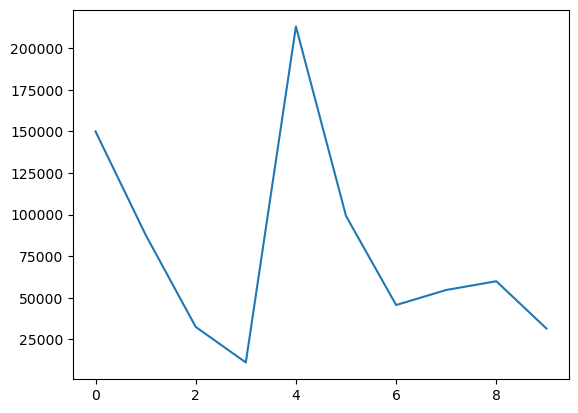

In [46]:
car_sales["Odometer (KM)"].plot()

<Axes: >

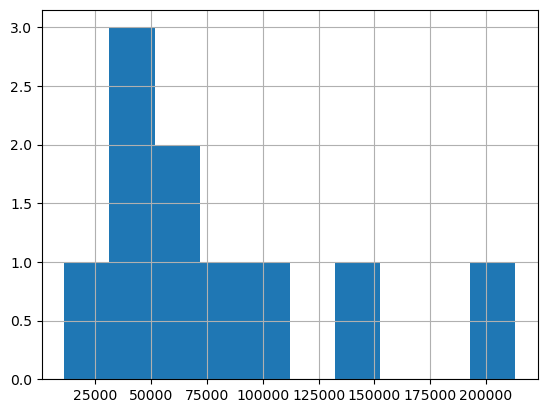

In [47]:
car_sales["Odometer (KM)"].hist()

In [49]:
car_sales["Price"].dtype

dtype('O')

In [59]:
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '', regex=True).astype(int)

In [60]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000


<Axes: >

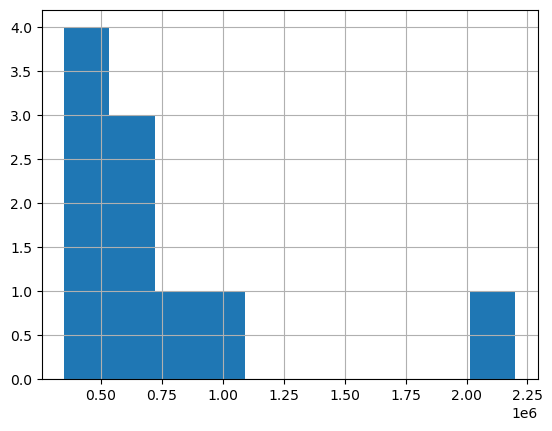

In [52]:
car_sales["Price"].hist()

<Axes: >

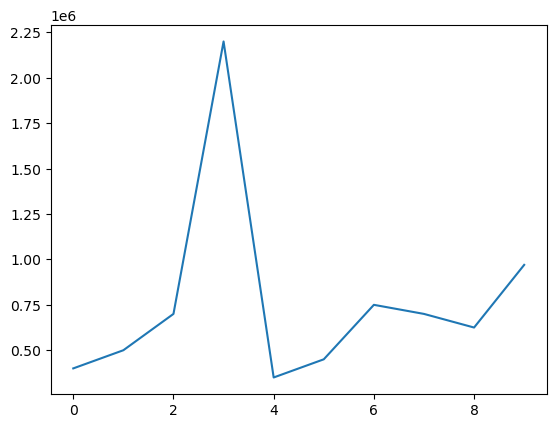

In [53]:
car_sales["Price"].plot()

## Manipulating Data

In [61]:
car_sales["Make"].str.lower()

0    toyota
1     honda
2    toyota
3       bmw
4    nissan
5    toyota
6     honda
7     honda
8    toyota
9    nissan
Name: Make, dtype: object

In [62]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000


In [63]:
car_sales["Make"] = car_sales["Make"].str.lower()

In [64]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,toyota,White,150043,4,400000
1,honda,Red,87899,4,500000
2,toyota,Blue,32549,3,700000
3,bmw,Black,11179,5,2200000
4,nissan,White,213095,4,350000


In [65]:
car_sales_missing = pd.read_csv("data/car-sales-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [69]:
# filling missing values with mean value
# This will not change NaN data in the dataframe
car_sales_missing["Odometer"].fillna(car_sales_missing["Odometer"].mean())

0    150043.000000
1     87899.000000
2     92302.666667
3     11179.000000
4    213095.000000
5     92302.666667
6     92302.666667
7     92302.666667
8     60000.000000
9     31600.000000
Name: Odometer, dtype: float64

In [70]:
car_sales_missing.head()

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"


In [73]:
car_sales_missing["Odometer"].fillna(car_sales_missing["Odometer"].mean(),
                                    inplace=True)
# Using inplace=True will modify them in the dataframe, no need to assign again
# Same as
#car_sales_missing["Odometer"] = car_sales_missing["Odometer"].fillna(car_sales_missing["Odometer"].mean(),
#                                                                     inplace=True)

C:\Users\rosha\AppData\Local\Temp\ipykernel_23520\2783260010.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing["Odometer"].fillna(car_sales_missing["Odometer"].mean(),


In [74]:
car_sales_missing.head()

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"


In [75]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"
6,Honda,NaN,92302.666667,4.0,"$7,500"
7,Honda,Blue,92302.666667,4.0,NaN
8,Toyota,White,60000.000000,NaN,NaN
9,NaN,White,31600.000000,4.0,"$9,700"


In [82]:
# Drop NaN or NA values
car_sales_missing.dropna(inplace=True)

In [83]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"


In [85]:
car_sales_missing = pd.read_csv("data/car-sales-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [86]:
car_sales_missing_dropped = car_sales_missing.dropna()
car_sales_missing_dropped

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"


In [87]:
car_sales_missing_dropped.to_csv("data/car-sales-missing-dropped-data.csv")

In [88]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [95]:
# Column from series - Not needed to be exact length, other values mentioned as NaN in DF
seats_column = pd.Series([5, 5, 5, 5, 5])

# New column called seats
car_sales["Seats"] = seats_column
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM
0,toyota,White,150043,4,400000,5.0,7.5
1,honda,Red,87899,4,500000,5.0,9.2
2,toyota,Blue,32549,3,700000,5.0,5.0
3,bmw,Black,11179,5,2200000,5.0,9.6
4,nissan,White,213095,4,350000,5.0,8.7
5,toyota,Green,99213,4,450000,NaN,4.7
6,honda,Blue,45698,4,750000,NaN,8.9
7,honda,Blue,54738,4,700000,NaN,1.2
8,toyota,White,60000,4,625000,NaN,4.5
9,nissan,White,31600,4,970000,NaN,6.0


In [98]:
car_sales["Seats"].fillna(5, inplace=True)

C:\Users\rosha\AppData\Local\Temp\ipykernel_23520\1647811259.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales["Seats"].fillna(5, inplace=True)


In [92]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,toyota,White,150043,4,400000,5.0
1,honda,Red,87899,4,500000,5.0
2,toyota,Blue,32549,3,700000,5.0
3,bmw,Black,11179,5,2200000,5.0
4,nissan,White,213095,4,350000,5.0
5,toyota,Green,99213,4,450000,5.0
6,honda,Blue,45698,4,750000,5.0
7,honda,Blue,54738,4,700000,5.0
8,toyota,White,60000,4,625000,5.0
9,nissan,White,31600,4,970000,5.0


In [96]:
# Column from python list (SHould be the same length as the DF)
fuel_economy = [7.5, 9.2, 5.0, 9.6, 8.7, 4.7, 8.9, 1.2, 4.5, 6.0]
car_sales["Fuel per 100KM"] = fuel_economy
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM
0,toyota,White,150043,4,400000,5.0,7.5
1,honda,Red,87899,4,500000,5.0,9.2
2,toyota,Blue,32549,3,700000,5.0,5.0
3,bmw,Black,11179,5,2200000,5.0,9.6
4,nissan,White,213095,4,350000,5.0,8.7
5,toyota,Green,99213,4,450000,NaN,4.7
6,honda,Blue,45698,4,750000,NaN,8.9
7,honda,Blue,54738,4,700000,NaN,1.2
8,toyota,White,60000,4,625000,NaN,4.5
9,nissan,White,31600,4,970000,NaN,6.0


In [100]:
car_sales["Total fuel used (L)"] = car_sales["Odometer (KM)"]/100 * car_sales["Fuel per 100KM"]
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used,Total fuel used (L)
0,toyota,White,150043,4,400000,5.0,7.5,11253.225,11253.225
1,honda,Red,87899,4,500000,5.0,9.2,8086.708,8086.708
2,toyota,Blue,32549,3,700000,5.0,5.0,1627.450,1627.450
3,bmw,Black,11179,5,2200000,5.0,9.6,1073.184,1073.184
4,nissan,White,213095,4,350000,5.0,8.7,18539.265,18539.265
5,toyota,Green,99213,4,450000,5.0,4.7,4663.011,4663.011
6,honda,Blue,45698,4,750000,5.0,8.9,4067.122,4067.122
7,honda,Blue,54738,4,700000,5.0,1.2,656.856,656.856
8,toyota,White,60000,4,625000,5.0,4.5,2700.000,2700.000
9,nissan,White,31600,4,970000,5.0,6.0,1896.000,1896.000


In [101]:
# Create a column from a single value
car_sales["Number of wheels"] = 4
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used,Total fuel used (L),Number of wheels
0,toyota,White,150043,4,400000,5.0,7.5,11253.225,11253.225,4
1,honda,Red,87899,4,500000,5.0,9.2,8086.708,8086.708,4
2,toyota,Blue,32549,3,700000,5.0,5.0,1627.450,1627.450,4
3,bmw,Black,11179,5,2200000,5.0,9.6,1073.184,1073.184,4
4,nissan,White,213095,4,350000,5.0,8.7,18539.265,18539.265,4
5,toyota,Green,99213,4,450000,5.0,4.7,4663.011,4663.011,4
6,honda,Blue,45698,4,750000,5.0,8.9,4067.122,4067.122,4
7,honda,Blue,54738,4,700000,5.0,1.2,656.856,656.856,4
8,toyota,White,60000,4,625000,5.0,4.5,2700.000,2700.000,4
9,nissan,White,31600,4,970000,5.0,6.0,1896.000,1896.000,4


In [102]:
car_sales["Passed road safety"] = True

In [103]:
car_sales.dtypes

Make                    object
Colour                  object
Odometer (KM)            int64
Doors                    int64
Price                    int64
Seats                  float64
Fuel per 100KM         float64
Total fuel used        float64
Total fuel used (L)    float64
Number of wheels         int64
Passed road safety        bool
dtype: object

In [104]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used,Total fuel used (L),Number of wheels,Passed road safety
0,toyota,White,150043,4,400000,5.0,7.5,11253.225,11253.225,4,True
1,honda,Red,87899,4,500000,5.0,9.2,8086.708,8086.708,4,True
2,toyota,Blue,32549,3,700000,5.0,5.0,1627.450,1627.450,4,True
3,bmw,Black,11179,5,2200000,5.0,9.6,1073.184,1073.184,4,True
4,nissan,White,213095,4,350000,5.0,8.7,18539.265,18539.265,4,True
5,toyota,Green,99213,4,450000,5.0,4.7,4663.011,4663.011,4,True
6,honda,Blue,45698,4,750000,5.0,8.9,4067.122,4067.122,4,True
7,honda,Blue,54738,4,700000,5.0,1.2,656.856,656.856,4,True
8,toyota,White,60000,4,625000,5.0,4.5,2700.000,2700.000,4,True
9,nissan,White,31600,4,970000,5.0,6.0,1896.000,1896.000,4,True


In [106]:
# Drop a column
car_sales = car_sales.drop("Total fuel used", axis=1)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used (L),Number of wheels,Passed road safety
0,toyota,White,150043,4,400000,5.0,7.5,11253.225,4,True
1,honda,Red,87899,4,500000,5.0,9.2,8086.708,4,True
2,toyota,Blue,32549,3,700000,5.0,5.0,1627.450,4,True
3,bmw,Black,11179,5,2200000,5.0,9.6,1073.184,4,True
4,nissan,White,213095,4,350000,5.0,8.7,18539.265,4,True
5,toyota,Green,99213,4,450000,5.0,4.7,4663.011,4,True
6,honda,Blue,45698,4,750000,5.0,8.9,4067.122,4,True
7,honda,Blue,54738,4,700000,5.0,1.2,656.856,4,True
8,toyota,White,60000,4,625000,5.0,4.5,2700.000,4,True
9,nissan,White,31600,4,970000,5.0,6.0,1896.000,4,True


In [109]:
car_sales_shuffled = car_sales.sample(frac=1)
car_sales_shuffled

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used (L),Number of wheels,Passed road safety
5,toyota,Green,99213,4,450000,5.0,4.7,4663.011,4,True
6,honda,Blue,45698,4,750000,5.0,8.9,4067.122,4,True
7,honda,Blue,54738,4,700000,5.0,1.2,656.856,4,True
4,nissan,White,213095,4,350000,5.0,8.7,18539.265,4,True
9,nissan,White,31600,4,970000,5.0,6.0,1896.000,4,True
2,toyota,Blue,32549,3,700000,5.0,5.0,1627.450,4,True
8,toyota,White,60000,4,625000,5.0,4.5,2700.000,4,True
1,honda,Red,87899,4,500000,5.0,9.2,8086.708,4,True
0,toyota,White,150043,4,400000,5.0,7.5,11253.225,4,True
3,bmw,Black,11179,5,2200000,5.0,9.6,1073.184,4,True


In [111]:
# Only select 20% of data
car_sales_shuffled.sample(frac=0.2)

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used (L),Number of wheels,Passed road safety
4,nissan,White,213095,4,350000,5.0,8.7,18539.265,4,True
8,toyota,White,60000,4,625000,5.0,4.5,2700.000,4,True


In [112]:
car_sales_shuffled.reset_index(drop=True, inplace=True)
car_sales_shuffled

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used (L),Number of wheels,Passed road safety
0,toyota,Green,99213,4,450000,5.0,4.7,4663.011,4,True
1,honda,Blue,45698,4,750000,5.0,8.9,4067.122,4,True
2,honda,Blue,54738,4,700000,5.0,1.2,656.856,4,True
3,nissan,White,213095,4,350000,5.0,8.7,18539.265,4,True
4,nissan,White,31600,4,970000,5.0,6.0,1896.000,4,True
5,toyota,Blue,32549,3,700000,5.0,5.0,1627.450,4,True
6,toyota,White,60000,4,625000,5.0,4.5,2700.000,4,True
7,honda,Red,87899,4,500000,5.0,9.2,8086.708,4,True
8,toyota,White,150043,4,400000,5.0,7.5,11253.225,4,True
9,bmw,Black,11179,5,2200000,5.0,9.6,1073.184,4,True


In [113]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used (L),Number of wheels,Passed road safety
0,toyota,White,150043,4,400000,5.0,7.5,11253.225,4,True
1,honda,Red,87899,4,500000,5.0,9.2,8086.708,4,True
2,toyota,Blue,32549,3,700000,5.0,5.0,1627.450,4,True
3,bmw,Black,11179,5,2200000,5.0,9.6,1073.184,4,True
4,nissan,White,213095,4,350000,5.0,8.7,18539.265,4,True
5,toyota,Green,99213,4,450000,5.0,4.7,4663.011,4,True
6,honda,Blue,45698,4,750000,5.0,8.9,4067.122,4,True
7,honda,Blue,54738,4,700000,5.0,1.2,656.856,4,True
8,toyota,White,60000,4,625000,5.0,4.5,2700.000,4,True
9,nissan,White,31600,4,970000,5.0,6.0,1896.000,4,True


In [114]:
car_sales["Odometer (KM)"] = car_sales["Odometer (KM)"].apply(lambda x: x/1.6)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used (L),Number of wheels,Passed road safety
0,toyota,White,93776.875,4,400000,5.0,7.5,11253.225,4,True
1,honda,Red,54936.875,4,500000,5.0,9.2,8086.708,4,True
2,toyota,Blue,20343.125,3,700000,5.0,5.0,1627.450,4,True
3,bmw,Black,6986.875,5,2200000,5.0,9.6,1073.184,4,True
4,nissan,White,133184.375,4,350000,5.0,8.7,18539.265,4,True
5,toyota,Green,62008.125,4,450000,5.0,4.7,4663.011,4,True
6,honda,Blue,28561.250,4,750000,5.0,8.9,4067.122,4,True
7,honda,Blue,34211.250,4,700000,5.0,1.2,656.856,4,True
8,toyota,White,37500.000,4,625000,5.0,4.5,2700.000,4,True
9,nissan,White,19750.000,4,970000,5.0,6.0,1896.000,4,True
